* The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. 
* With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. 
* Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. 
* Most of them serving the same food. Bengaluru being an IT capital of India. 
* Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. 
* With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. 
* What kind of a food is more popular in a locality. 
* Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. 
* These kind of analysis can be done using the data, by studying different factors.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Locating path of dataset locally and reading the file using pd.read_csv()

In [73]:
path= r'/home/aman/Documents/files/zomato.csv'
df=pd.read_csv(path)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Get information about shape and columns of dataset, to look and remove and not required columns

In [74]:
print(f"The shape of the data set is {df.shape}")
print(f"The columns present in the Dataset are \n{df.columns}")

The shape of the data set is (51717, 17)
The columns present in the Dataset are 
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


#### Drop the unrequired datasets
* url
* address
* phone
* dish_liked
* menu_item

In [75]:
df= df.drop(['url','address','phone','dish_liked','menu_item','reviews_list'], axis=1)

In [76]:
print(f"The shape of the data set after dropping some columns is {df.shape}")
print(f"The columns present in the Dataset are \n{df.columns}")

The shape of the data set after dropping some columns is (51717, 11)
The columns present in the Dataset are 
Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


#### Get the information about number of null values in the dataset

In [77]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

#### Dropping the Duplicate rows in the dataset


In [78]:
df.drop_duplicates(inplace=True)

In [79]:
print(f"The shape of the data set after dropping rows with duplicates is {df.shape}")
print(f"The columns present in the Dataset are \n{df.columns}")

The shape of the data set after dropping rows with duplicates is (51609, 11)
The columns present in the Dataset are 
Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


#### Edit the rate column


In [80]:
print(df['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [81]:
# if the value is 'NEW' then convert into nan
# else condition is slicing the rate


def editratecolumn(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value= value[0]
        return float(value)


In [82]:
df['rate']= df['rate'].apply(editratecolumn)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [83]:
# null values in that columns are replaced with the mean of that columns
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [84]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

#### Dropping NUll Values

In [85]:
df.dropna(inplace=True)

In [86]:
df.shape

(51042, 11)

### Renaming the column names

In [87]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)

In [88]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type', 'listed_in(city)'],
      dtype='object')

In [89]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [90]:
# remove ',' from the numbers Example: 1,200 to 1200
df['Cost2plates']= df['Cost2plates'].str.replace(',','')

In [91]:
## change datatypes of Cost2plates and votes
df= df.astype({'votes':'int'})
df= df.astype({'Cost2plates':'int'})

In [92]:
df.dtypes

name                object
online_order        object
book_table          object
rate               float64
votes                int64
location            object
rest_type           object
cuisines            object
Cost2plates          int64
Type                object
listed_in(city)     object
dtype: object

#### There are two columns in df where we find location, drop one of it

In [93]:
df=df.drop(['listed_in(city)'],axis=1)

#### cleaning rest type column

In [94]:
df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

#### Making rest_types less than 1000 in frequency as others

In [95]:
rest_types= df['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [96]:
rest_types_less_than1000 = rest_types[rest_types<1000]
rest_types_less_than1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [97]:
def handle_rest_types(value):
    if(value in rest_types_less_than1000):
        return 'others'
    else:
        return value


df['rest_type']= df['rest_type'].apply(handle_rest_types)
df['rest_type'].unique()
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

#### Cleaning the Location Column

In [98]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [99]:
location = df['location'].value_counts(ascending=False)

location_less_than300 = location[location<300]
def handle_location(value):
    if(value in location_less_than300):
        return 'others'
    else:
        return value

In [100]:
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

#### Cleaning Cuisines Column

In [101]:
cuisines= df['cuisines'].value_counts(ascending=False)

cuisines_less_than100=  cuisines[cuisines<100]

def handle_cuisines(value):
    if(value in cuisines_less_than100):
        return 'others'
    else:
        return value

df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

# Data is cleaned


## Start with Visualization

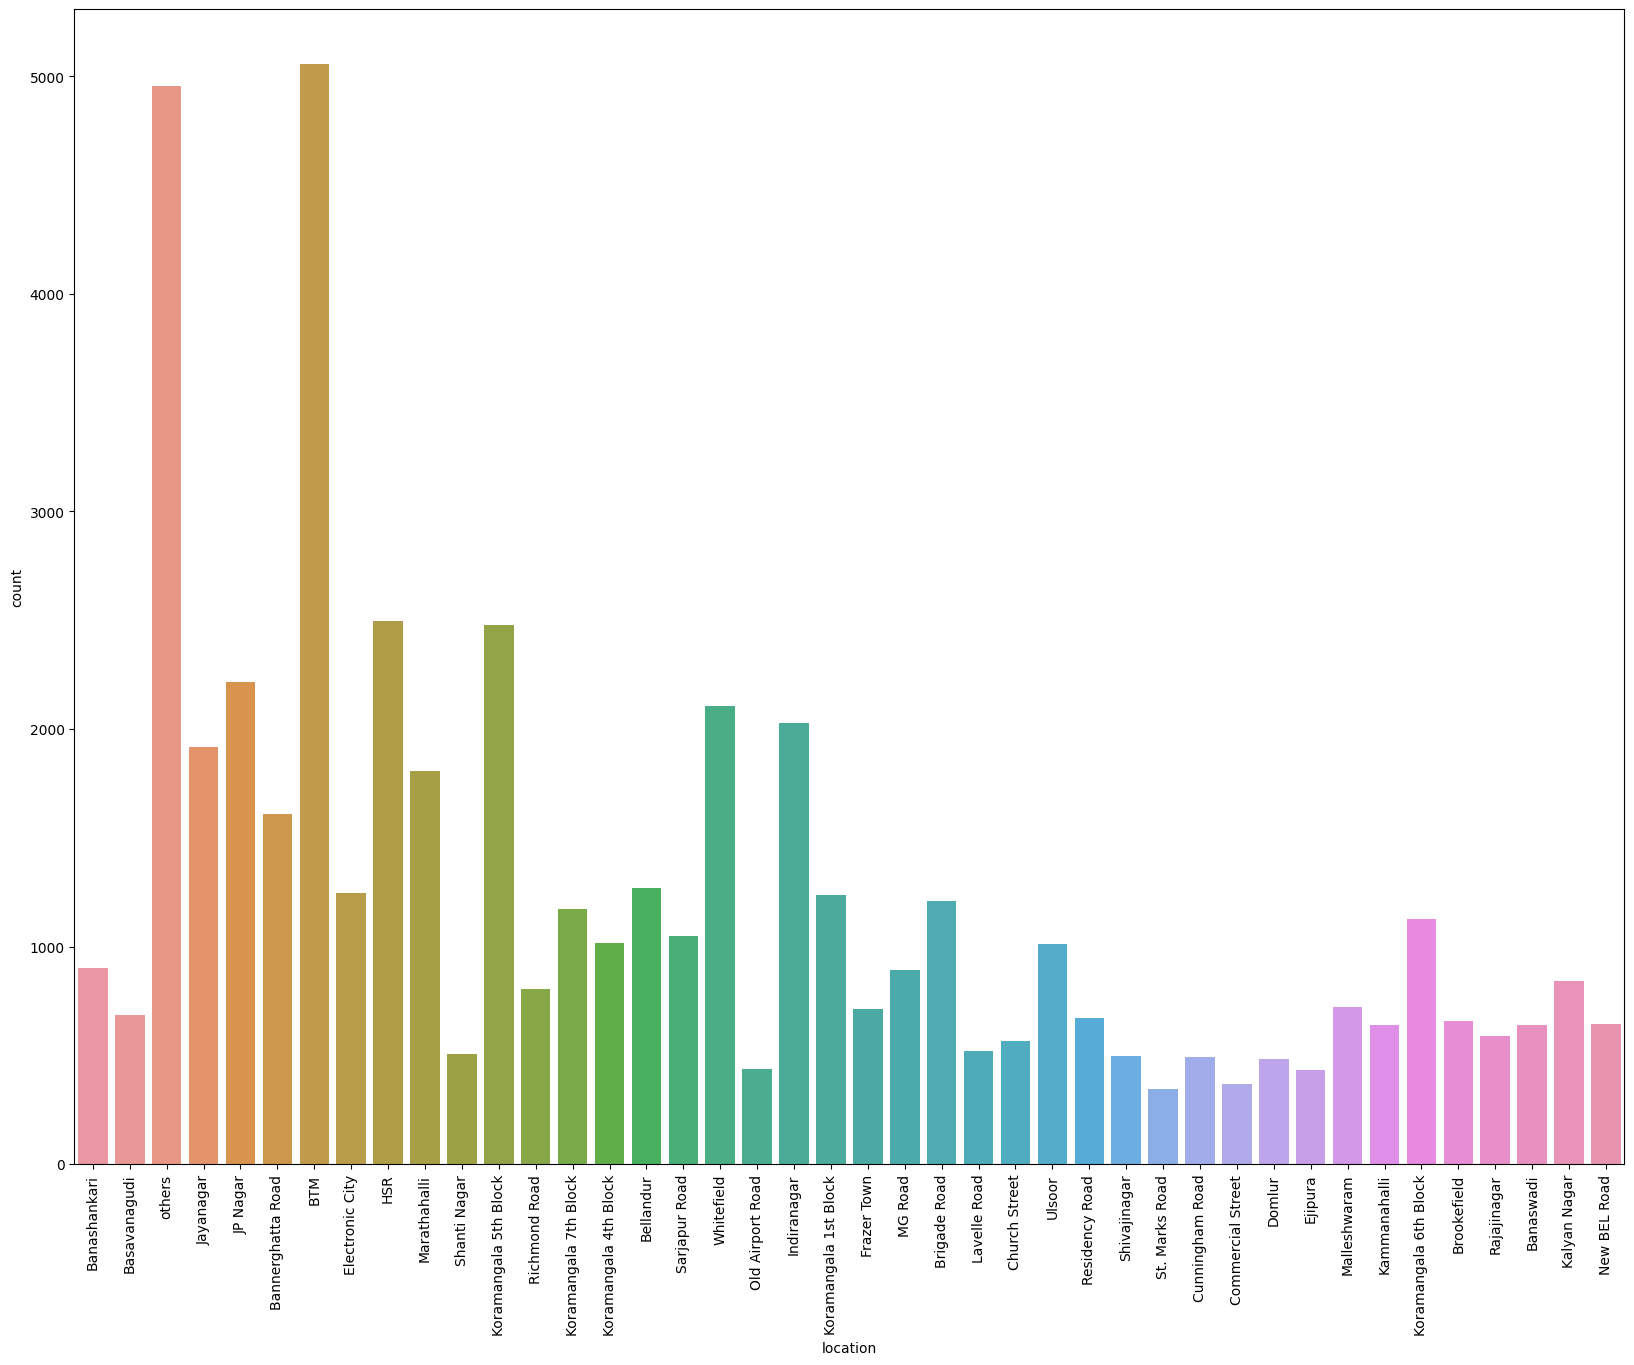

In [102]:
plt.figure(figsize=(15,30))
ax= sns.countplot(x=df['location'],data=df)
plt.xticks(rotation=90)
plt.show()

### Insight 1
* From the above chart we can notice, there are more restarants in areas like BTM. 
* So opening at BTM might be risky


## Visualize Online Order

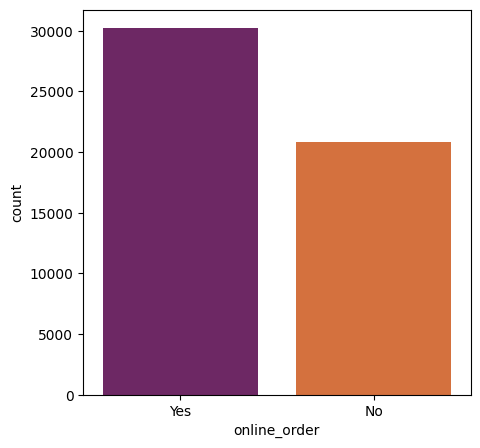

In [103]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['online_order'],palette='inferno',data=df)
plt.show()

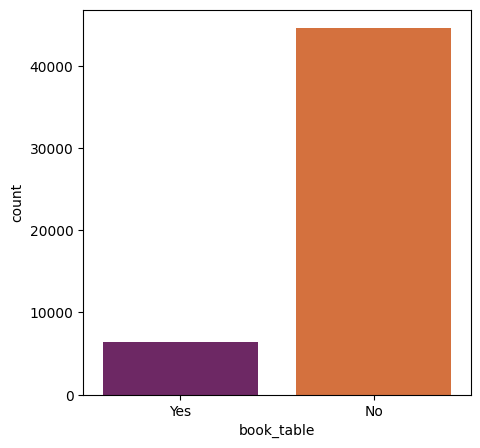

In [104]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['book_table'],palette='inferno')
plt.show()

### Online order vs Rate

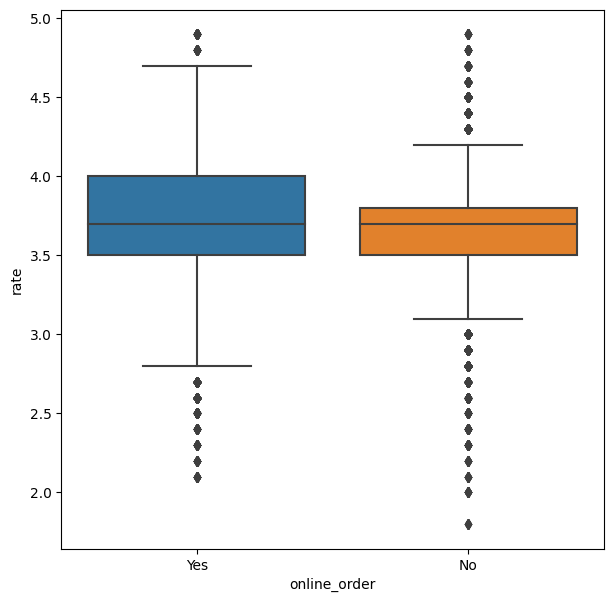

In [105]:
plt.figure(figsize=(7,7))
sns.boxplot(x=df['online_order'], y= df['rate'],data=df)
plt.show()

### Rating is maximum for onlne orders

* middle line is average rating, which is near between 3.5 and 4.0 
* mamimum rating is different anyways , we can observe that 

## Book table vs Rate

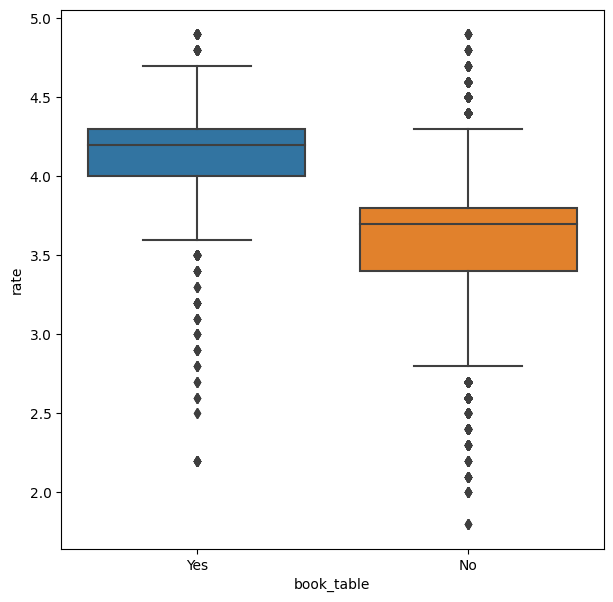

In [106]:
plt.figure(figsize=(7,7))
sns.boxplot(x=df['book_table'],y=df['rate'],data=df)
plt.show()

* we can notice the restaurants that having the book table facility were given more rating that the restaurants that are not having booking table facility
* if you open a hotel , keep a book table facility for attracting more customers.

In [107]:
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1= pd.read_csv('location_online.csv')
df1


,location,online_order,name
0,BTM,No,1763
1,BTM,Yes,3293
2,Banashankari,No,397
3,Banashankari,Yes,505
4,Banaswadi,No,302
...,...,...,...
79,Ulsoor,Yes,622
80,Whitefield,No,986
81,Whitefield,Yes,1119
82,others,No,2064


In [108]:
df1= pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)


In [109]:
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

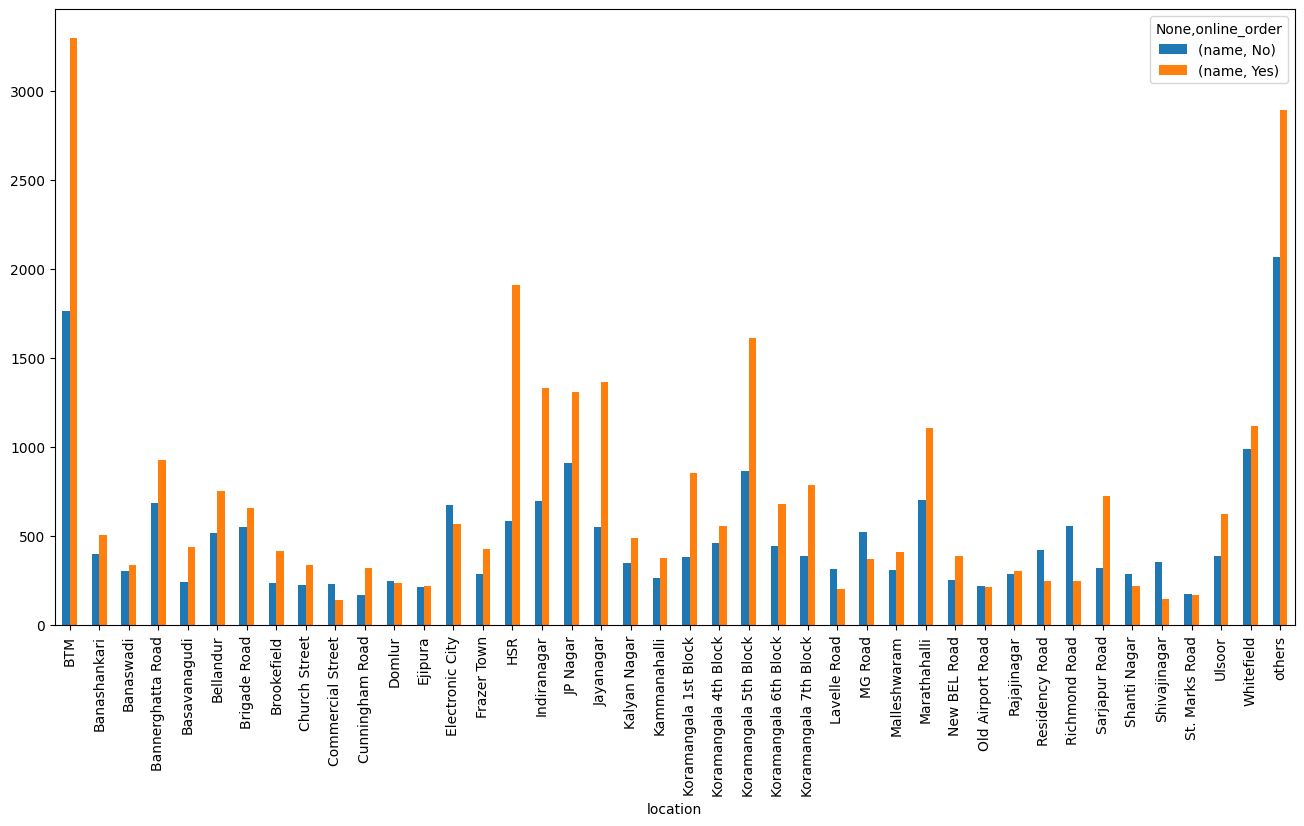

In [110]:
df1.plot(kind='bar',figsize=(16,8))
plt.show()

### Visualizing book table facility, location wise

In [111]:
df2= df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')



In [112]:
df2= pd.read_csv('location_booktable.csv')
df2

,location,book_table,name
0,BTM,No,4889
1,BTM,Yes,167
2,Banashankari,No,839
3,Banashankari,Yes,63
4,Banaswadi,No,632
...,...,...,...
77,Ulsoor,Yes,177
78,Whitefield,No,1852
79,Whitefield,Yes,253
80,others,No,4587


In [113]:
df2= pd.pivot_table(df2,values=None, index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)

In [114]:
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<AxesSubplot:xlabel='location'>

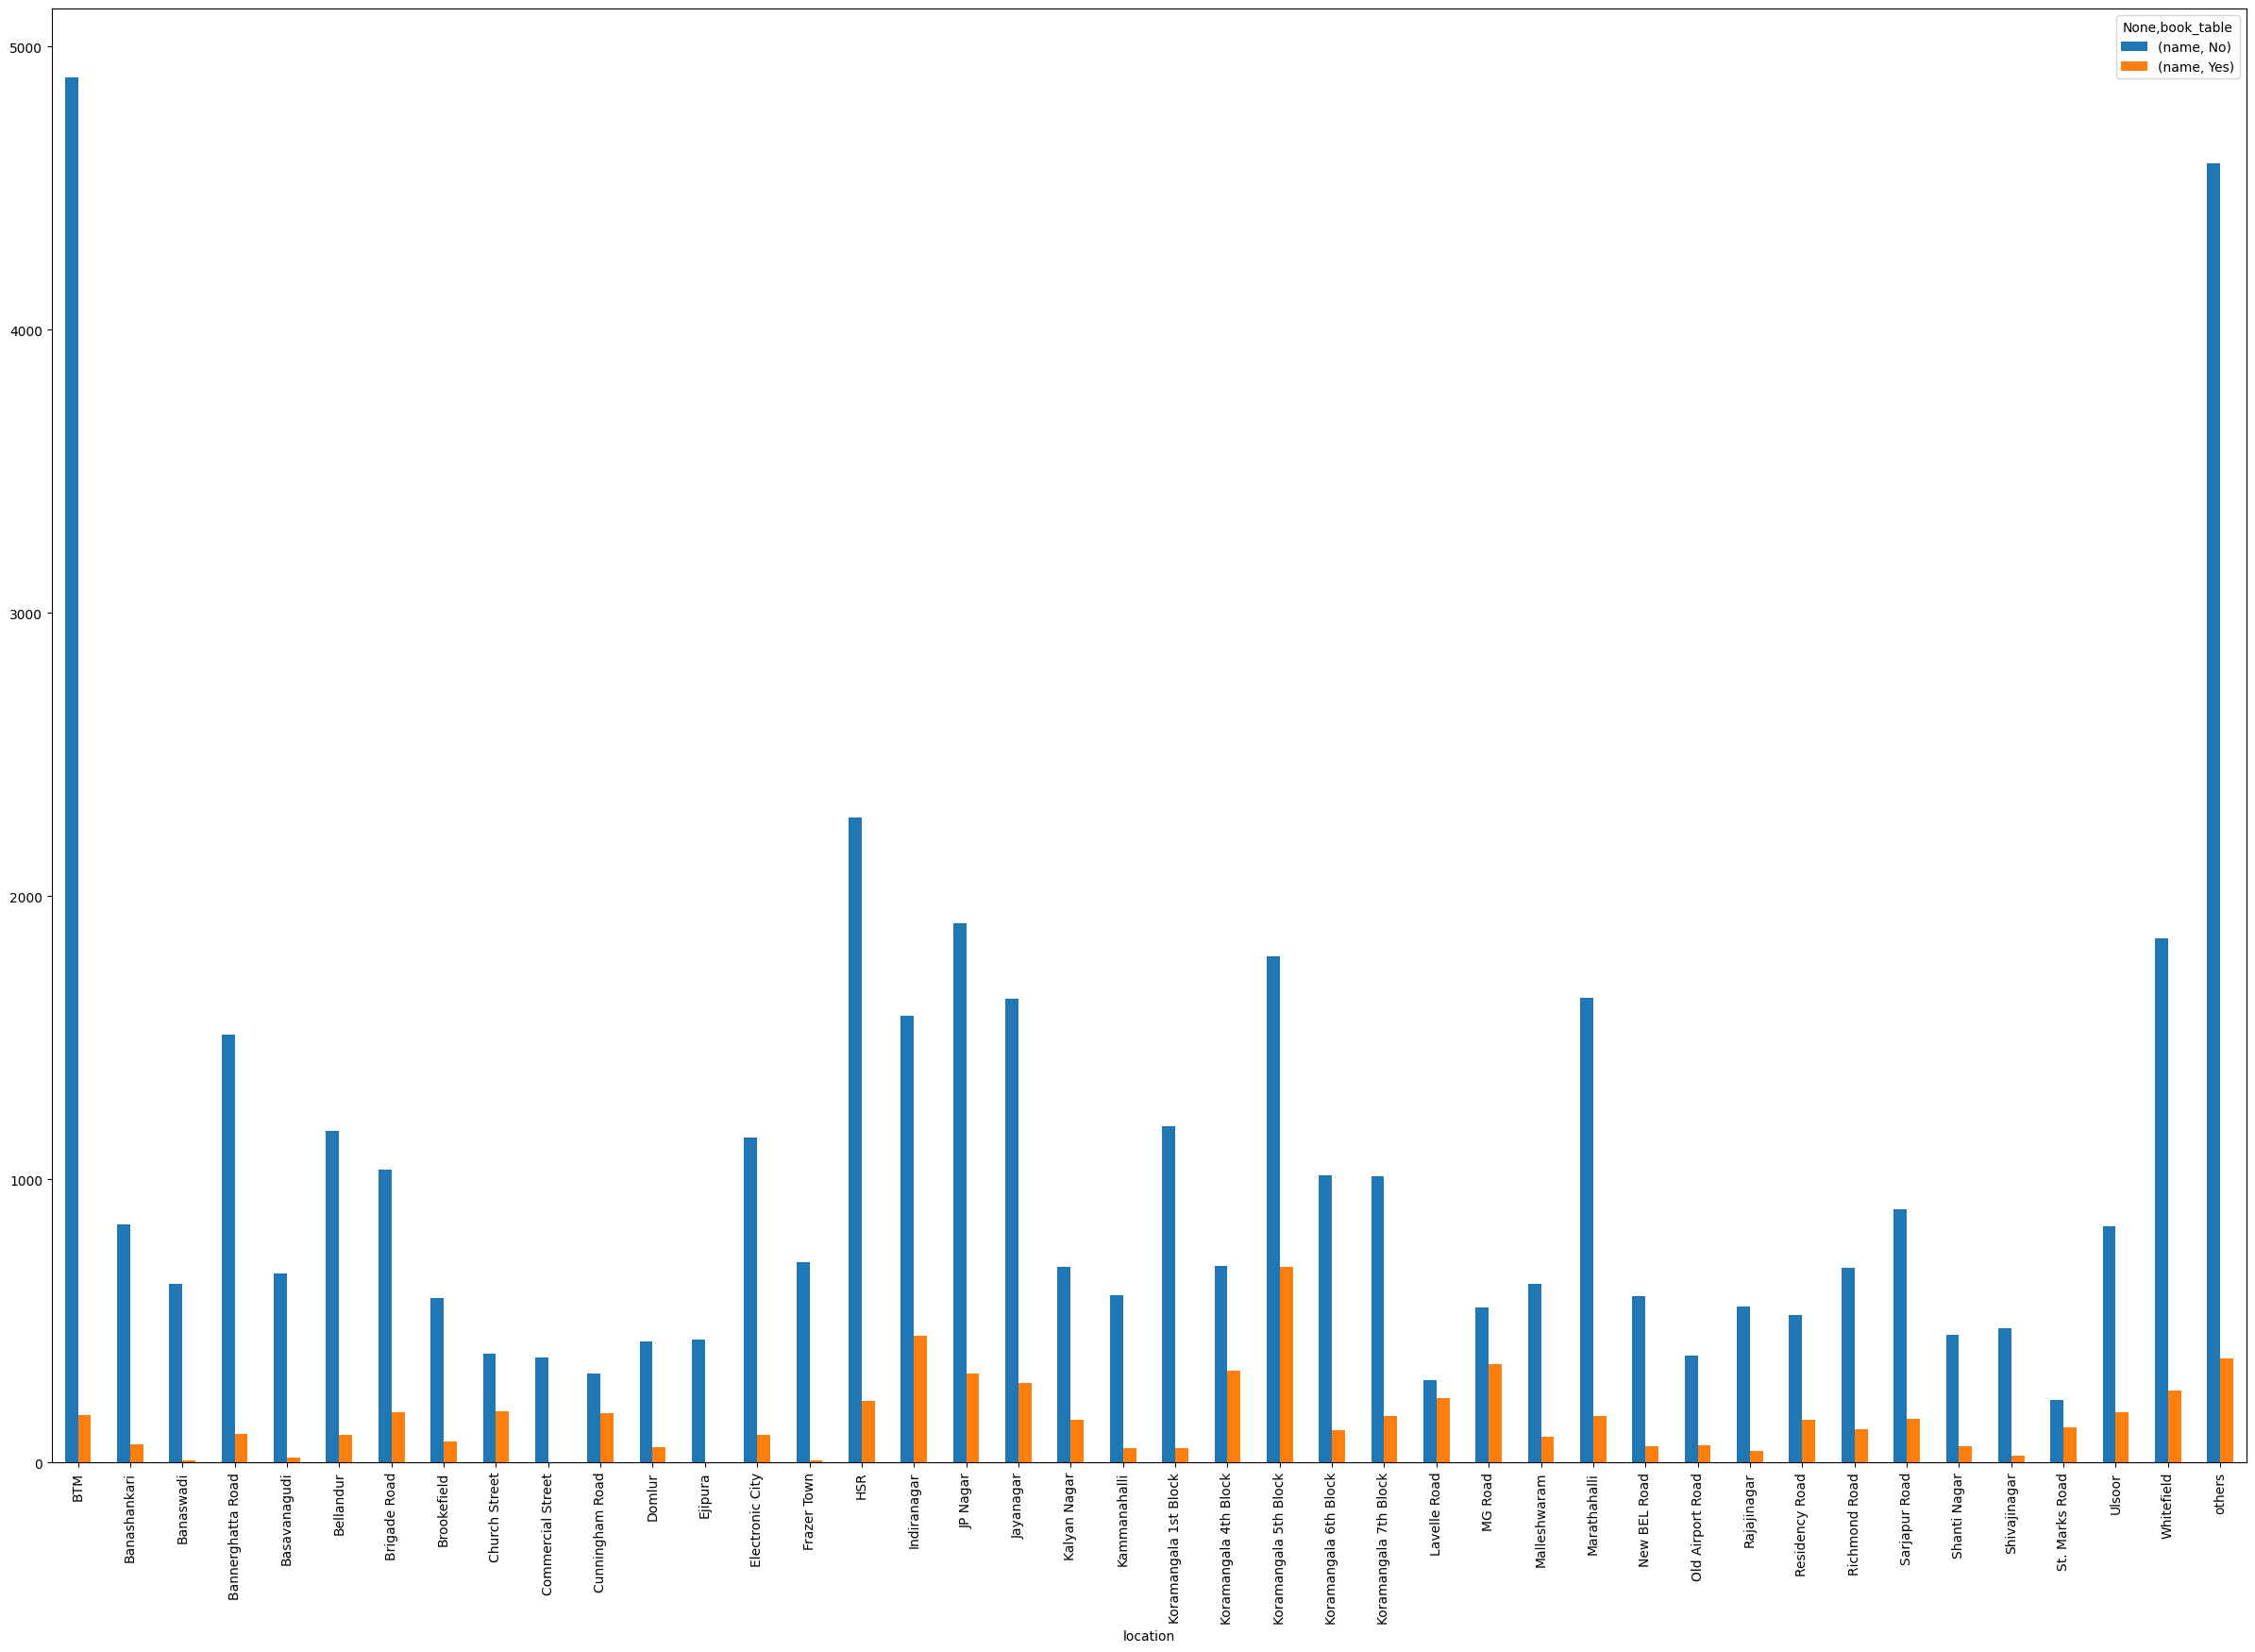

In [115]:
df2.plot(kind='bar',figsize=(30,20))

#### Types of restaurants vs rate

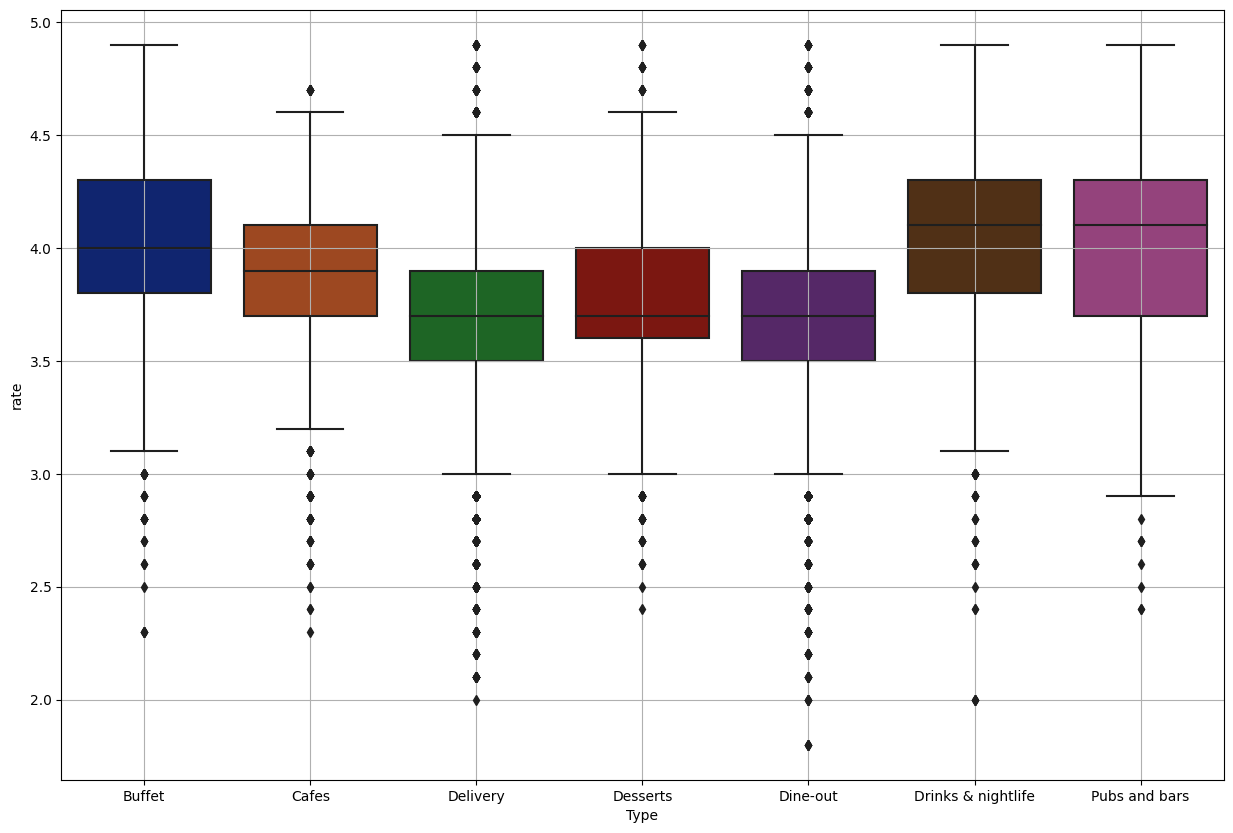

In [116]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Type',y='rate',data=df, palette='dark')
plt.grid()
plt.show()


### maximum rating eas given to 'Drinks and Nightlife' kind of type of restaurants

In [119]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet
